In [208]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import laplace
from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import sobel_h, sobel_v, sobel

## Visualización

(-0.5, 255.5, 255.5, -0.5)

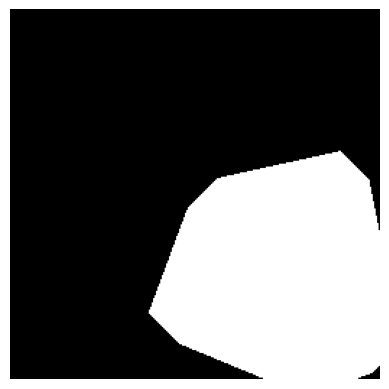

In [178]:
spot= cv2.imread('images\SPOT.png',0).astype(np.int16)
plt.imshow(spot,cmap='gray')
plt.axis('off')

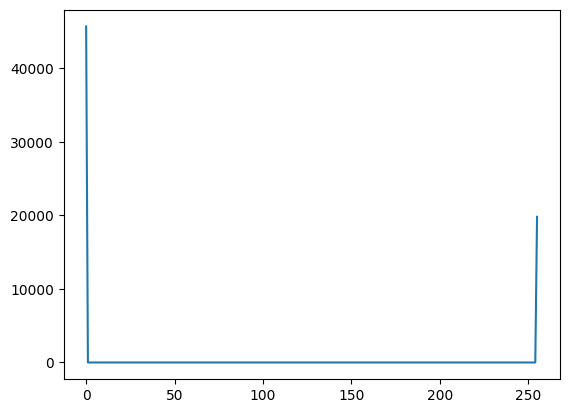

In [179]:
hist=cv2.calcHist([spot.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)

## Filtro Laplaciano

(-0.5, 255.5, 255.5, -0.5)

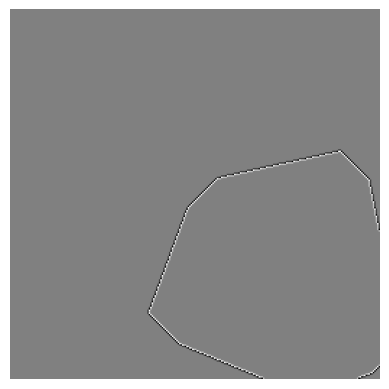

In [180]:
img_l = laplace(spot, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')

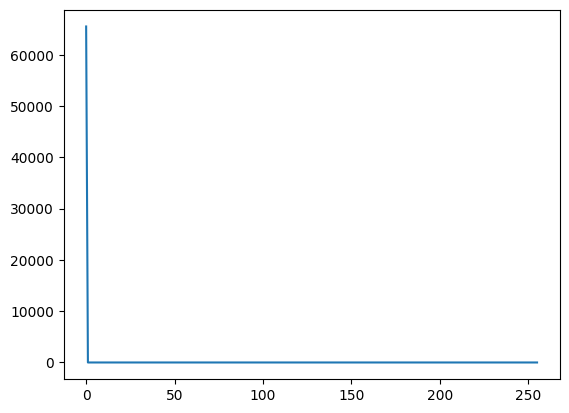

In [181]:
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)


(-0.5, 255.5, 255.5, -0.5)

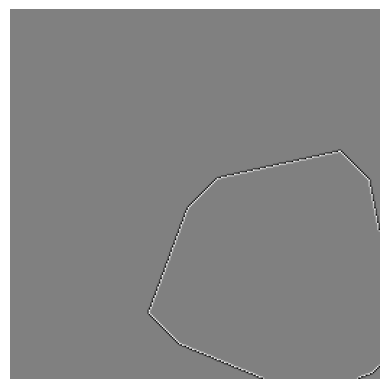

In [182]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')

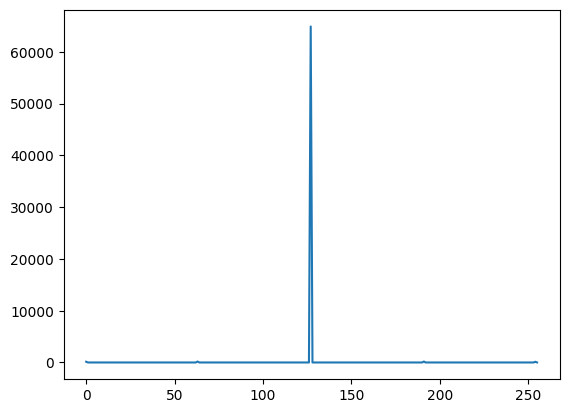

In [183]:
hist=cv2.calcHist([rescaled_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)

### ¿Cómo es la respuesta del Laplaciano en las regiones homogéneas de la imagen y en los contornos? ¿A qué se debe este resultado?

El laplaciano acentúa los contornos de la imágen mientras que ignora las partes de color homogénea. Esto se debe a que por naturaleza el laplaciano trabaja con la segunda derivada espacial de la imagen, resultando en máximos los lugares en los que se da un cambio de color y en valores cercanos a cero donde no hay cambios. Debido a que, los cambios de color demarcan los contornos, estos son resaltados.  

## Operador LoG (Laplacian of Gaussian)

(-0.5, 255.5, 255.5, -0.5)

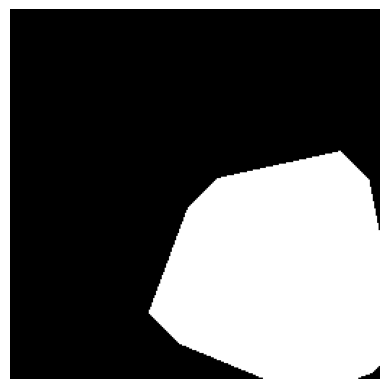

In [184]:
img_s = gaussian(spot, sigma=0, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

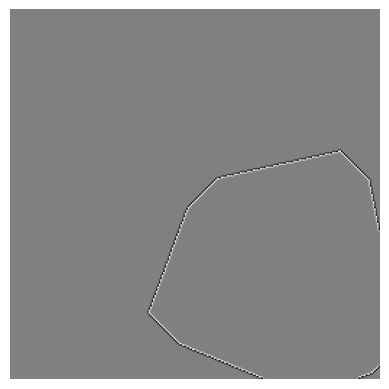

In [185]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')

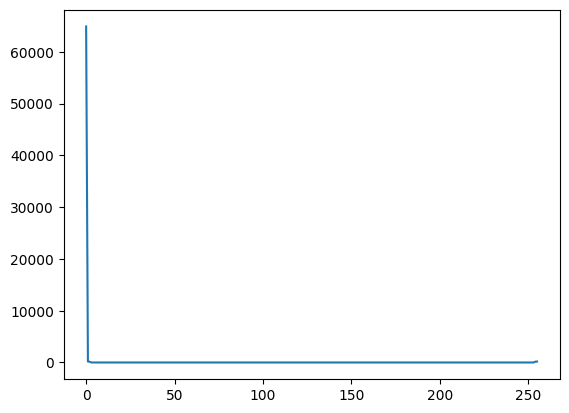

In [186]:
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)


(-0.5, 255.5, 255.5, -0.5)

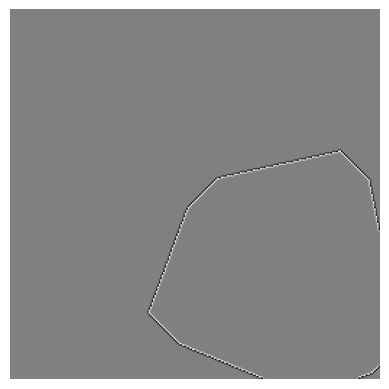

In [187]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')

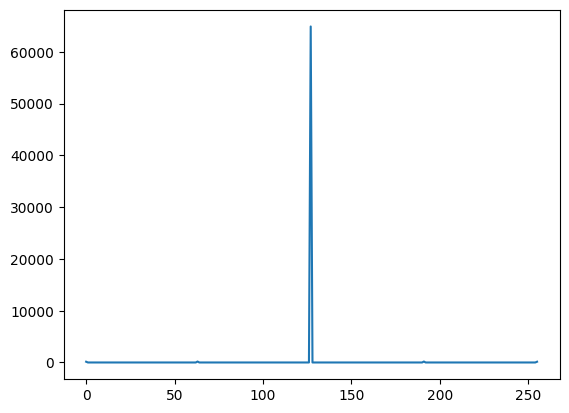

In [188]:
hist=cv2.calcHist([rescaled_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)

### ¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior? ¿A qué se debe este resultado?
El nuevo resultado se ve practicamente igual al del ejercicio anterior. Esto se debe a que al asignar sigma=0 eliminamos el suavisador y conservamos el ruido.

(-0.5, 255.5, 255.5, -0.5)

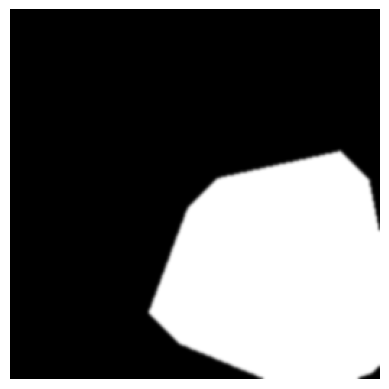

In [189]:
img_s = gaussian(spot, sigma=1, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')

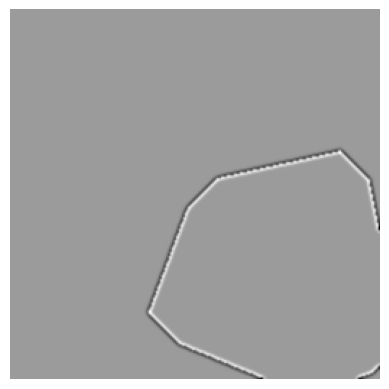

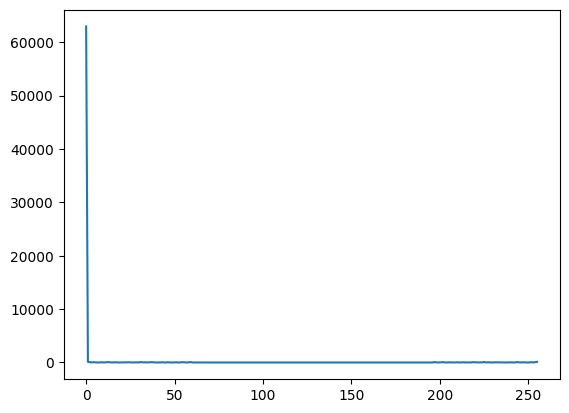

In [190]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()


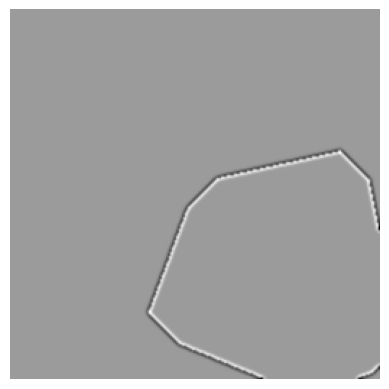

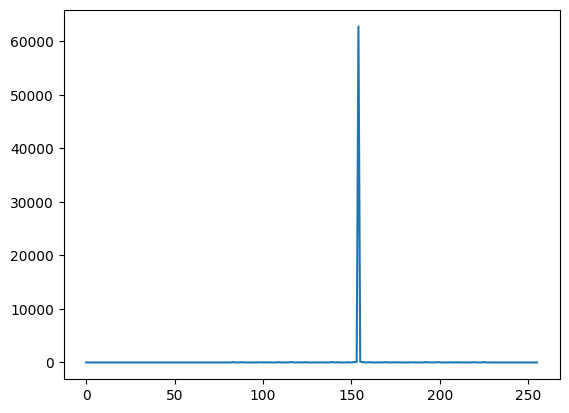

In [191]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([rescaled_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

### ¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior? ¿A qué se debe este resultado?
Al usar un ruido Gausseano de 1 se resuce tanto la nitidez de la imagen como el ruido de la misma. Esto genera que los contornos sean más gruesos y continuos. Esto pasa ya que el ruido Gausseano reduce la frecuencia antes del cálculo de la segunda derivada con el laplaceano, reduciendo las falsas detecciones y haciendo que el histograma muestre mayores valores en x.

(-0.5, 255.5, 255.5, -0.5)

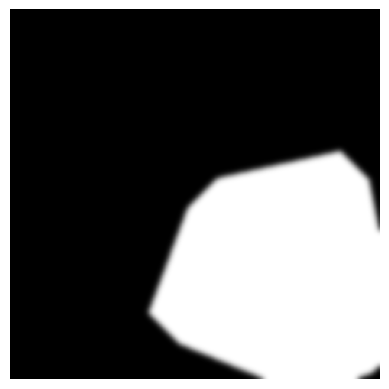

In [192]:
img_s = gaussian(spot, sigma=2, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')

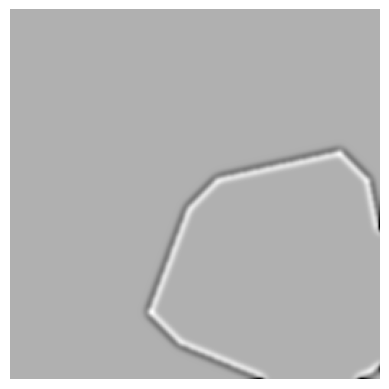

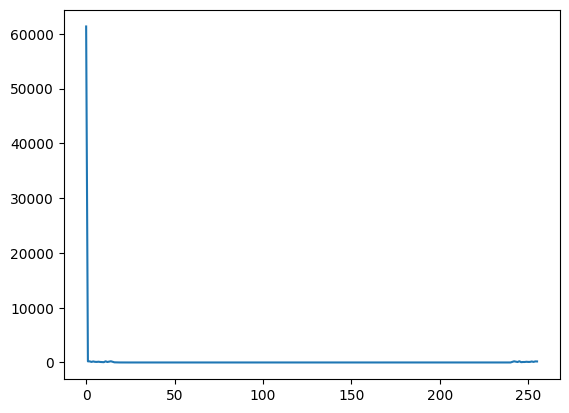

In [193]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

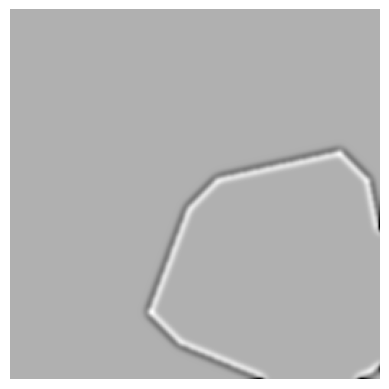

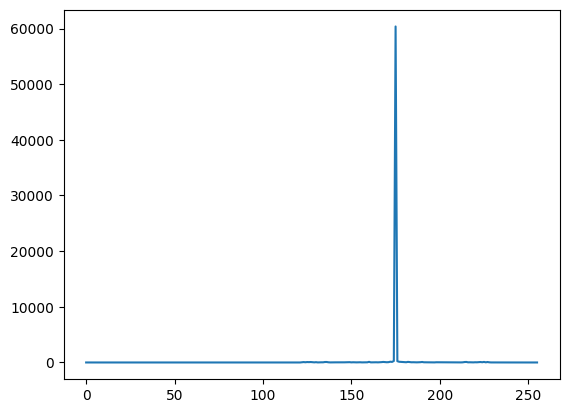

In [194]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([rescaled_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

### ¿Cómo es la respuesta de este LoG? ¿A qué se debe este resultado?
Al usar un ruido Gausseano con sigma=2 la imagen pierde aún más nitidez y ruido. Esto genera contornos aún más gruesos que con sigma=1. Estos bordes pueden resultar demadiado gruesos pues eliminan los detalles, aún así, un sigma de este valor resultaría útil si lo que se busca priorizar es la continuidad del contorno.

## Comparación Sobel

(-0.5, 255.5, 255.5, -0.5)

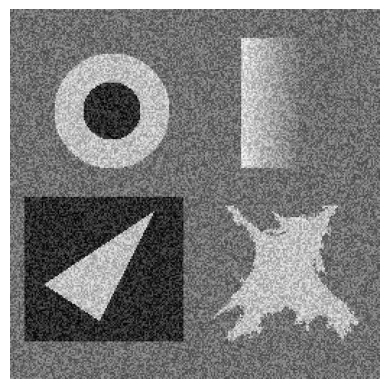

In [195]:
bruit= cv2.imread('images\BRUIT.png', cv2.IMREAD_GRAYSCALE).astype(np.int16)
plt.imshow(bruit, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

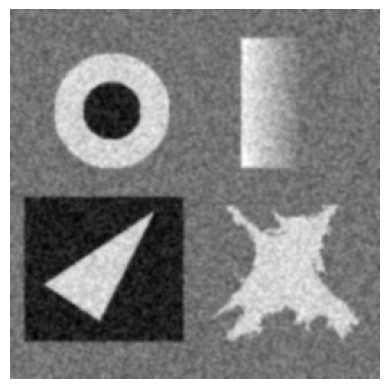

In [196]:
img_s = gaussian(bruit, sigma=1, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')

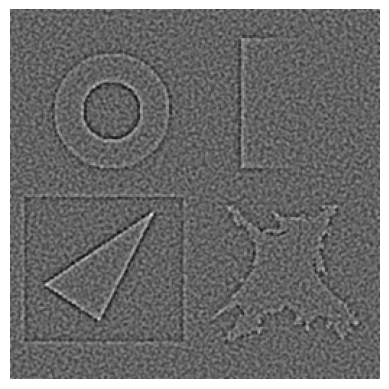

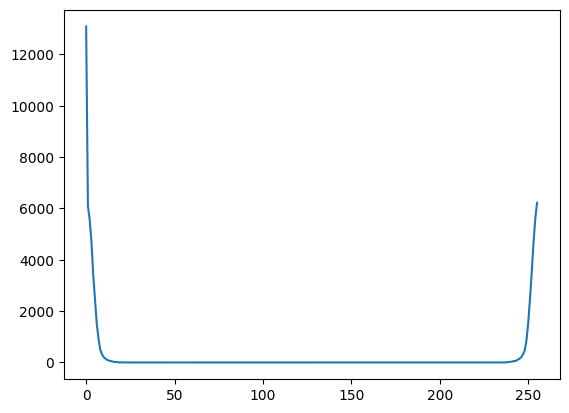

In [197]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

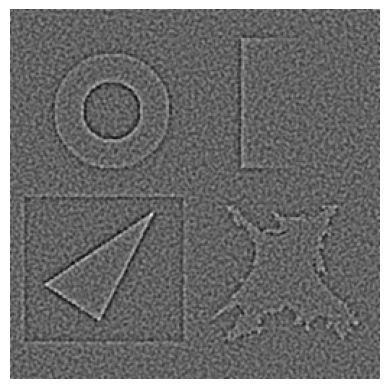

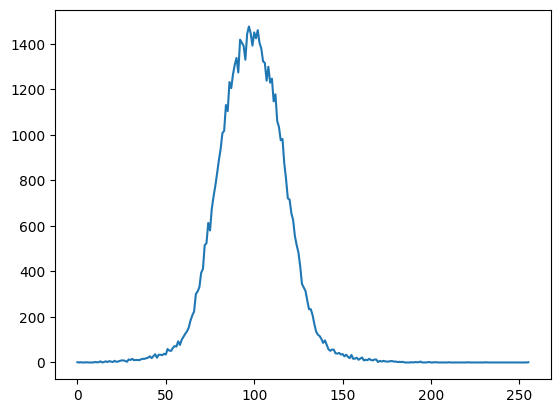

In [198]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
rescaled_img = rescaled_img.astype(np.uint8)
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([rescaled_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

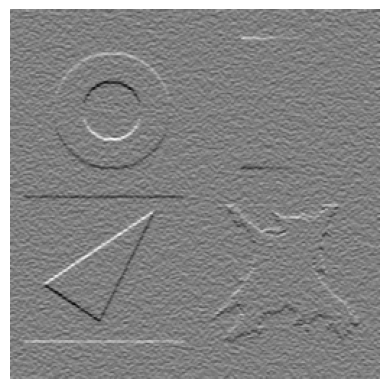

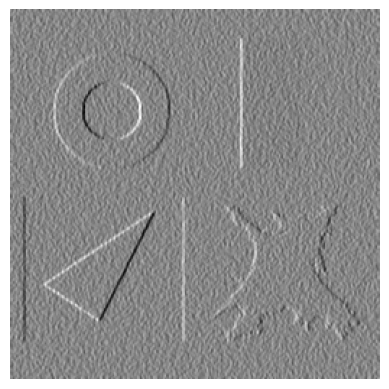

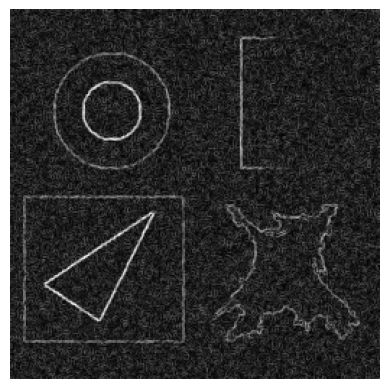

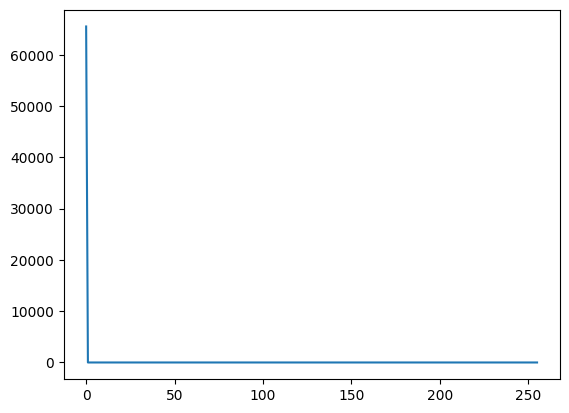

In [210]:
converted = bruit.astype(np.int32)
converted.dtype
img_sh = sobel_h(converted)
plt.imshow(img_sh, cmap='gray')
plt.axis('off')
plt.show()
img_sv = sobel_v(converted)
plt.imshow(img_sv, cmap='gray')
plt.axis('off')
plt.show()
sobel_img = sobel(converted)
plt.imshow(sobel_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([sobel_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

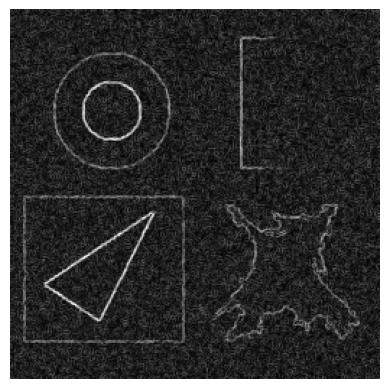

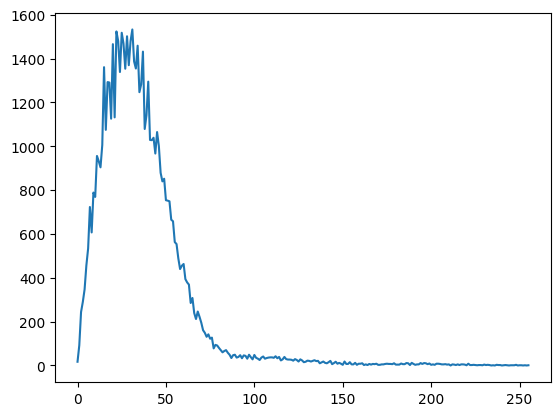

In [211]:
rescaled_img = exposure.rescale_intensity(sobel_img, in_range=(sobel_img.min(), sobel_img.max()), out_range=(0, 255))
rescaled_img = rescaled_img.astype(np.uint8)
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([rescaled_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

### ¿En cuál de las dos imágenes es más fácil detectar los contornos. ¿Por qué ? ¿Cómo afecta el ruido la detección de los contornos en cada caso?

Aunque tanto LoG como Sobel entrengan resultados de calidad similar, a mi parecer Sobel entrega mejores resultados. Esto se puede deber a que LoG resalta cambios de curvatura y suele requerir detección de cero-cruces o reescalado para obtener contornos binarios. 

Sobel aumenta las falsas detecciones por ruido, esto se puede mitigar con suavizado. El Laplaciano sin suavizado es muy sensible al ruido; el LoG reduce este efecto según el valor de sigma.

## Realce Laplaciano

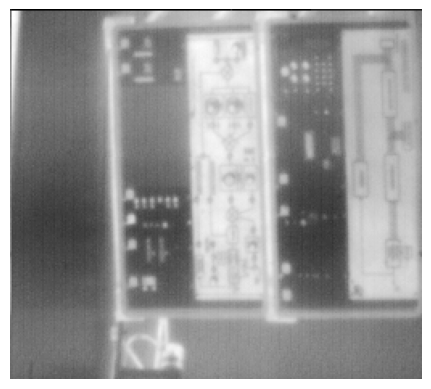

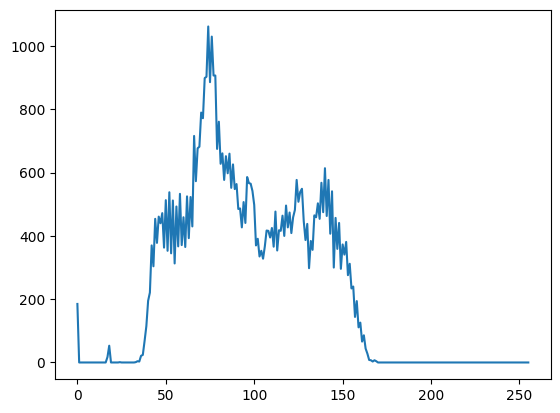

In [201]:
film= cv2.imread('images\FILM.png', cv2.IMREAD_GRAYSCALE).astype(np.int16)
plt.imshow(film, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([film.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

(-0.5, 255.5, 229.5, -0.5)

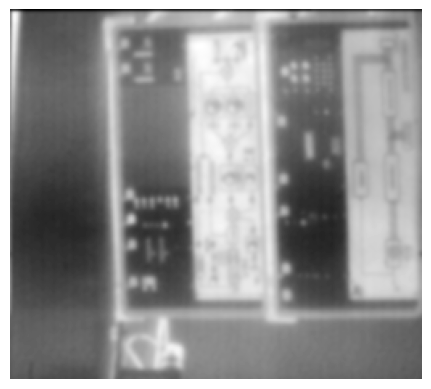

In [202]:
img_s = gaussian(film, sigma=1, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')

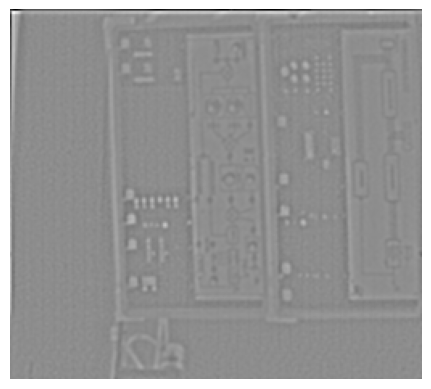

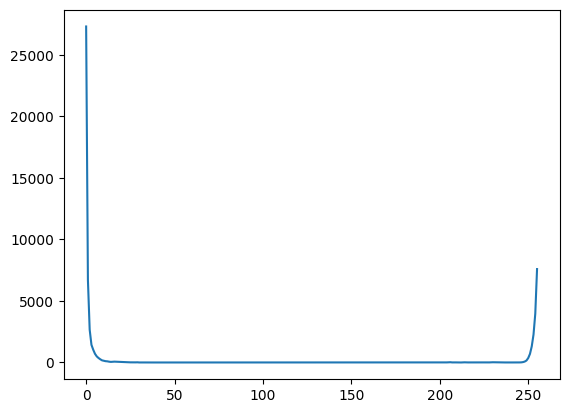

In [203]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

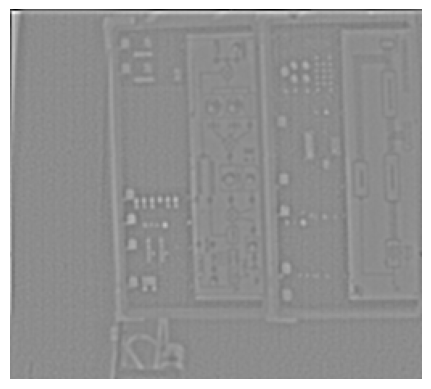

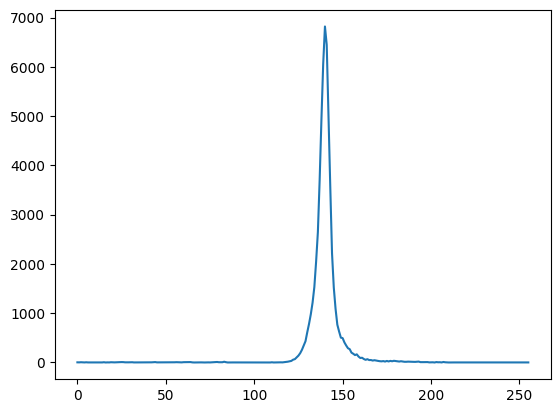

In [204]:
rescaled_img = exposure.rescale_intensity(img_l, in_range=(img_l.min(), img_l.max()), out_range=(0, 255))
rescaled_img = rescaled_img.astype(np.uint8)
plt.imshow(rescaled_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([rescaled_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

(-0.5, 255.5, 229.5, -0.5)

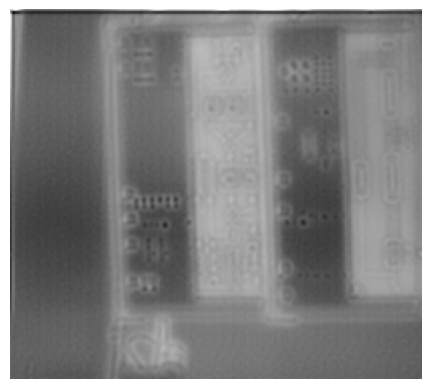

In [205]:
partial_img= film*0.6
inverted_img = 255 - rescaled_img
result= cv2.add(partial_img.astype(np.uint8), inverted_img)
plt.imshow(result, cmap='gray')
plt.axis('off')



(-0.5, 255.5, 229.5, -0.5)

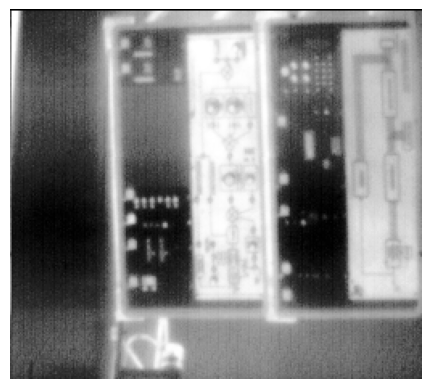

In [206]:
imagen_equ = cv2.equalizeHist(film.astype(np.uint8))
plt.imshow(imagen_equ, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 229.5, -0.5)

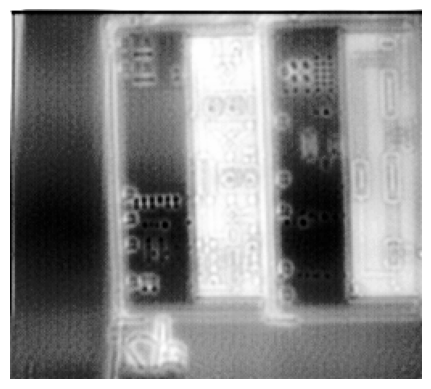

In [207]:
imagen_equ = cv2.equalizeHist(result)
plt.imshow(imagen_equ, cmap='gray')
plt.axis('off')

### ¿Cuál es su conclusión?

El realce  laplaciano genera una imágen donde se realzan los bordes mientras se mantiene la imagen original. Esto mejora la percepción del contraste en la imagen original.